In [34]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#import tensorflow as tf
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Bidirectional
from keras.layers import Dropout
from keras.optimizers import Adam
from numpy.random import seed
from utils import *

In [8]:
def evaluation_metric_new(y_test,y_hat):
    MSE = metrics.mean_squared_error(y_test, y_hat)
    RMSE = MSE**0.5
    MAE = metrics.mean_absolute_error(y_test,y_hat)
    R2 = metrics.r2_score(y_test,y_hat)
    res = {
        'MSE': MSE,
        'RMSE': RMSE,
        'MAE': MAE,
        'R2': R2
    }
    return res
#     print('MSE: %.5f' % MSE)
#     print('RMSE: %.5f' % RMSE)
#     print('MAE: %.5f' % MAE)
#     print('R2: %.5f' % R2)


In [35]:
def lstm(n, model_type, X_train, core_X_train):
    # Core LSTM Model
    if model_type=='lstm':
        model = Sequential()
        model.add(LSTM(units=n, activation='relu', input_shape=(X_train.shape[1], 1)))
        model.add(Dense(units=1))
        
        core_model = Sequential()
        core_model.add(LSTM(units=n, activation='relu', input_shape=(core_X_train.shape[1],5)))
        core_model.add(Dense(units=5))
    
    elif model_type=='bilayer_lstm':
        model = Sequential()
        model.add(LSTM(units=n, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
        model.add(LSTM(units=n, activation='relu'))
        model.add(Dense(units=1))
        
        core_model = Sequential()
        core_model.add(LSTM(units=n, activation='relu', return_sequences=True, input_shape=(core_X_train.shape[1],5)))
        core_model.add(LSTM(units=n, activation='relu'))
        core_model.add(Dense(units=5))
        
    elif model_type=='trilayer_lstm':
        model = Sequential()
        model.add(LSTM(units=n, activation='relu', return_sequences=True,input_shape=(X_train.shape[1], 1)))
        model.add(LSTM(units=n, activation='relu', return_sequences=True))
        model.add(LSTM(units=n, activation='relu'))
        model.add(Dense(units=1))
        
        core_model = Sequential()
        core_model.add(LSTM(units=n, activation='relu', return_sequences=True,input_shape=(core_X_train.shape[1],5)))
        core_model.add(LSTM(units=n,return_sequences=True, activation='relu'))
        core_model.add(LSTM(units=n, activation='relu'))
        core_model.add(Dense(units=5))
        
    elif model_type=='quadlayer_lstm':
        model = Sequential()
        model.add(LSTM(units=n, activation='relu',return_sequences=True, input_shape=(X_train.shape[1], 1)))
        model.add(LSTM(units=n,return_sequences=True, activation='relu'))
        model.add(LSTM(units=n,return_sequences=True, activation='relu'))
        model.add(LSTM(units=n, activation='relu'))
        model.add(Dense(units=1))
        
        core_model = Sequential()
        core_model.add(LSTM(units=n,return_sequences=True, activation='relu', input_shape=(core_X_train.shape[1],5)))
        core_model.add(LSTM(units=n,return_sequences=True, activation='relu'))
        core_model.add(LSTM(units=n,return_sequences=True, activation='relu'))
        core_model.add(LSTM(units=n, activation='relu'))
        core_model.add(Dense(units=5))
    
    elif model_type == 'Bidirectional_lstm':
        model = Sequential()
        model.add(Bidirectional(LSTM(units=n, activation='relu'), input_shape=(X_train.shape[1], 1)))
        model.add(Dropout(0.45))
        model.add(Dense(units=1))
        
        core_model = Sequential()
        core_model.add(Bidirectional(LSTM(n, activation='relu'), input_shape=(core_X_train.shape[1],5)))
        core_model.add(Dropout(0.45))
        core_model.add(Dense(units=5))
        
    elif model_type == 'Bilayer_Bidirectional_lstm':
        model = Sequential()
        model.add(Bidirectional(LSTM(units=n, return_sequences=True,activation='relu'), input_shape=(X_train.shape[1], 1)))
        model.add(Bidirectional(LSTM(units=n, activation='relu')))
        model.add(Dense(units=1))
        
        core_model = Sequential()
        core_model.add(Bidirectional(LSTM(n, return_sequences=True,activation='relu'), input_shape=(core_X_train.shape[1],5)))
        core_model.add(Bidirectional(LSTM(n, activation='relu')))
        core_model.add(Dense(units=5))
        
    return model, core_model

In [3]:
seed(1)
tf.random.set_seed(1)

In [4]:
n_timesteps = 10
n_epochs = 50
model_type = 'Bidirectional_lstm'

Same As Before Reshaping
Same As Before Reshaping
Same As Before Reshaping
Same As Before Reshaping
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_14 (Bidirecti  (None, 200)              81600     
 onal)                                                           
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_24 (Dense)            (None, 1)                 201       
                                                                 
Total params: 81,801
Trainable params: 81,801
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
108/110 [============================>.] - ETA: 0s - loss: 0.0082WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000019013B2BA68> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.


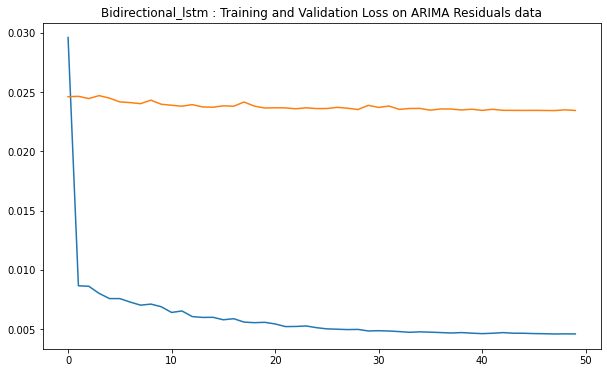

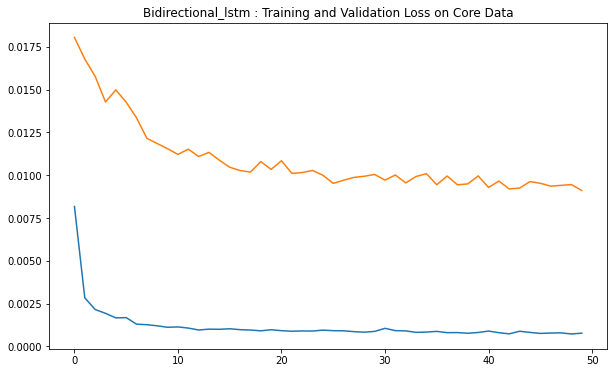

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
6/6 [==============================] - 0s 8ms/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report th

C:\Users\sawan\anaconda3\envs\lstm_x\lib\site-packages\ipykernel_launcher.py:131: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



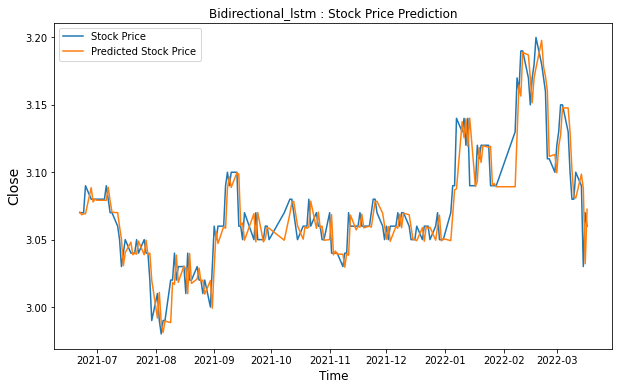

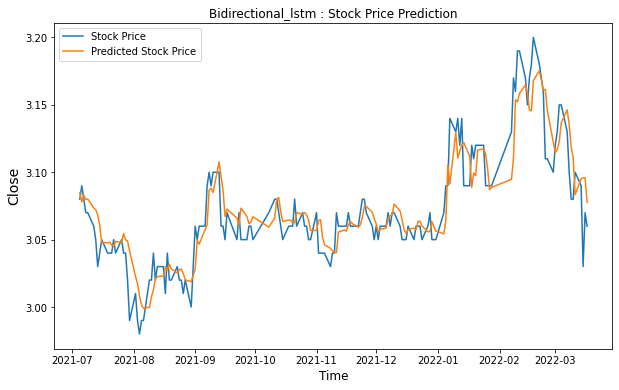

{'MSE': 0.0002729680795285744, 'RMSE': 0.016521745656212432, 'MAE': 0.01200618118997602, 'R2': 0.8421013664576784}


In [37]:
core_data = pd.read_csv('601988.SH.csv')
core_data.index = pd.to_datetime(core_data['trade_date'], format='%Y%m%d')
core_data = core_data.loc[:, ['open', 'high', 'low', 'close', 'amount']]
# core_data

arima_residuals_data = pd.read_csv('ARIMA_residuals1.csv')
arima_residuals_data.index = pd.to_datetime(arima_residuals_data['trade_date'])
arima_residuals_data = arima_residuals_data.drop('trade_date', axis=1)
# arima_residuals_data

arima_data = pd.read_csv('ARIMA.csv')
# arima_data

idx = 3500
training_set = arima_residuals_data.iloc[1:idx, :]
test_set = arima_residuals_data.iloc[idx:, :]

core_training_set = core_data.iloc[1:idx, :]
core_test_set = core_data.iloc[idx:, :]
# core_test_set

scaler = MinMaxScaler(feature_range=(0,1))
core_scaler = MinMaxScaler(feature_range=(0,1))

training_set_scaled = scaler.fit_transform(training_set)
test_set_scaled = scaler.fit_transform(test_set)

core_training_set_scaled = core_scaler.fit_transform(core_training_set)
core_test_set_scaled = core_scaler.fit_transform(core_test_set)
# training_set_scaled

X_train, y_train = data_split(training_set_scaled, n_timesteps)
X_train_new = X_train
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
if np.array_equal(X_train, X_train_new):
    print("Same As Before Reshaping")

X_test, y_test = data_split(test_set_scaled, n_timesteps)
X_test_new = X_test
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
if np.array_equal(X_test, X_test_new):
    print("Same As Before Reshaping")
    
core_X_train, core_y_train = data_split(core_training_set_scaled, n_timesteps)
core_X_train_new = core_X_train
core_X_train = core_X_train.reshape(core_X_train.shape[0], core_X_train.shape[1], 5)
if np.array_equal(core_X_train, core_X_train_new):
    print("Same As Before Reshaping")
    
core_X_test, core_y_test = data_split(core_test_set_scaled, n_timesteps)
core_X_test_new = core_X_test
core_X_test = core_X_test.reshape(core_X_test.shape[0], core_X_test.shape[1], 5)
if np.array_equal(core_X_test, core_X_test_new):
    print("Same As Before Reshaping")

    
evaluations = []
model_types = ['Bidirectional_lstm']
# model_types = ['lstm', 'bilayer_lstm', 'Bidirectional_lstm', 'trilayer_lstm', 'quadlayer_lstm', 'Bilayer_Bidirectional_lstm']
for model_type in model_types:
    model, core_model = lstm(100, model_type, X_train, core_X_train)
    print(model.summary())

    adam = Adam(learning_rate=0.01)
    model.compile(optimizer='adam', loss='mse')
    core_model.compile(optimizer='adam', loss='mse')

    history = model.fit(X_train, y_train, batch_size=32, epochs=n_epochs, 
                        validation_data=(X_test, y_test), validation_freq=1)
    core_history = core_model.fit(core_X_train, core_y_train, batch_size=32, epochs=n_epochs, 
                                  validation_data=(core_X_test, core_y_test), validation_freq=1)

    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(model_type + " : Training and Validation Loss on ARIMA Residuals data")
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(core_history.history['loss'], label='Training Loss')
    plt.plot(core_history.history['val_loss'], label='Validation Loss')
    plt.title(model_type + " : Training and Validation Loss on Core Data")
    plt.show()

    core_predicted_stock_price = core_model.predict(core_X_test)
    core_predicted_stock_price = core_scaler.inverse_transform(core_predicted_stock_price)
    core_predicted_stock_price_close = np.array(core_predicted_stock_price[:, 3]).flatten().tolist()
    # core_predicted_stock_price_close

    core_predicted_stock_price_dict = {
        'trade_date': core_data.index[idx+10:],
        'close': core_predicted_stock_price_close
    }
    core_predicted = pd.DataFrame(core_predicted_stock_price_dict)
    core_predicted = core_predicted.set_index('trade_date', drop=True)
    # core_predicted = core_predicted.drop(['trade_date'])
    # core_predicted

    predicted_stock_price = model.predict(X_test)
    predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
    predicted_stock_price_close = np.array(predicted_stock_price[:, 0]).flatten().tolist()

    predicted_stock_price_dict = {
        'trade_date': arima_residuals_data.index[idx+10:],
        'close': predicted_stock_price_close
    }
    predicted = pd.DataFrame(core_predicted_stock_price_dict)
    predicted = predicted.set_index(['trade_date'], drop=True)
    # predicted

    core_real_price = core_scaler.inverse_transform(core_y_test)
    core_real_price_list = np.array(core_real_price[:, 3]).flatten().tolist()
    core_real_price_dict = {
        'trade_date': core_data.index[idx+10:],
        'close': core_real_price_list
    }
    core_real = pd.DataFrame(core_real_price_dict)
    core_real = core_real.set_index(['trade_date'], drop=True)
    # core_real

    real_price = scaler.inverse_transform(y_test)
    real_price_list = np.array(real_price[:, 0]).flatten().tolist()
    real_price_dict = {
        'trade_date': arima_residuals_data.index[idx+10:],
        'close': real_price_list
    }
    real = pd.DataFrame(real_price_dict)
    real = real.set_index(['trade_date'], drop=True)
    # real

    finalpredicted_stock_price = pd.concat([arima_data, predicted]).groupby('trade_date')['close'].sum().reset_index()
    finalpredicted_stock_price.index = pd.to_datetime(finalpredicted_stock_price['trade_date']) 
    finalpredicted_stock_price = finalpredicted_stock_price.drop(['trade_date'], axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(core_data.loc['2021-06-22':, 'close'], label='Stock Price')
    plt.plot(finalpredicted_stock_price['close'], label='Predicted Stock Price')
    plt.title(model_type + ' : Stock Price Prediction')
    plt.xlabel('Time', fontsize=12, verticalalignment='top')
    plt.ylabel('Close', fontsize=14, horizontalalignment='center')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(core_real['close'], label='Stock Price')
    plt.plot(core_predicted['close'], label='Predicted Stock Price')
    plt.title(model_type + ' : Stock Price Prediction')
    plt.xlabel('Time', fontsize=12, verticalalignment='top')
    plt.ylabel('Close', fontsize=14, horizontalalignment='center')
    plt.legend()
    plt.show()

    yhat = core_data.loc['2021-06-22':, 'close']
    results = evaluation_metric_new(finalpredicted_stock_price['close'],yhat)
    print(results)
    evaluations.append(results)

In [33]:
evaluations

[{'MSE': 0.0002729680795285744,
  'RMSE': 0.016521745656212432,
  'MAE': 0.01200618118997602,
  'R2': 0.8421013664576784},
 {'MSE': 0.0002729680795285744,
  'RMSE': 0.016521745656212432,
  'MAE': 0.01200618118997602,
  'R2': 0.8421013664576784},
 {'MSE': 0.0002729680795285744,
  'RMSE': 0.016521745656212432,
  'MAE': 0.01200618118997602,
  'R2': 0.8421013664576784},
 {'MSE': 0.0002729680795285744,
  'RMSE': 0.016521745656212432,
  'MAE': 0.01200618118997602,
  'R2': 0.8421013664576784},
 {'MSE': 0.0002729680795285744,
  'RMSE': 0.016521745656212432,
  'MAE': 0.01200618118997602,
  'R2': 0.8421013664576784},
 {'MSE': 0.0002729680795285744,
  'RMSE': 0.016521745656212432,
  'MAE': 0.01200618118997602,
  'R2': 0.8421013664576784}]

In [38]:
evaluations

[{'MSE': 0.0002729680795285744,
  'RMSE': 0.016521745656212432,
  'MAE': 0.01200618118997602,
  'R2': 0.8421013664576784}]